In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('/home/renatochaz/git/economic_policy_uncertainty/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
ds = pd.read_csv(f'{module_path}/global.csv')

In [4]:
inv = ds.copy()
inv_cons = ds.copy()
inv_un = ds.copy()
epu = ds.copy()
fbcf = ds.copy()
iie = ds.copy()

In [5]:
inv = inv.groupby(['ano'], as_index=False).agg({'inv':'mean'})

In [6]:
inv_cons = inv_cons[inv_cons['dum_kz'] == 1]
inv_un = inv_un[inv_un['dum_kz'] == 0]

inv_cons = inv_cons.groupby(['ano'], as_index=False).agg({'inv':'mean', 'dum_kz': 'first'})
inv_un = inv_un.groupby(['ano'], as_index=False).agg({'inv':'mean', 'dum_kz': 'first'})
inv_res = pd.concat([inv_cons, inv_un])

In [7]:
epu = epu.groupby(['ano'], as_index=False).agg({'ln_epu':'mean'})

In [9]:
fbcf['fbcf'] = np.log(fbcf['fbcf'])
fbcf = fbcf.groupby(['ano'], as_index=False).agg({'fbcf':'mean'})

In [10]:
iie['iee'] = np.log(iie['iee'])
iie = iie.groupby(['ano'], as_index=False).agg({'iee':'mean'})

In [9]:
pds = inv.join([epu['ln_epu'], fbcf['fbcf'], iie['iee']])

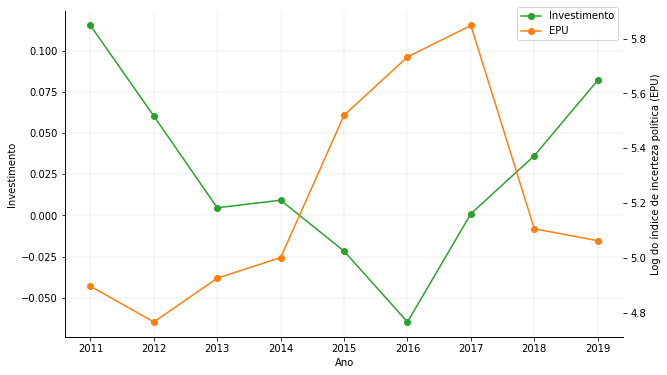

In [45]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#2ca02c'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='ln_epu',
    ax=ax2,
    legend=False,
    marker='o',
    color='#ff7f0e', 
    figsize=(10,6),
    label='EPU'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do índice de incerteza política (EPU)')
plt.show()

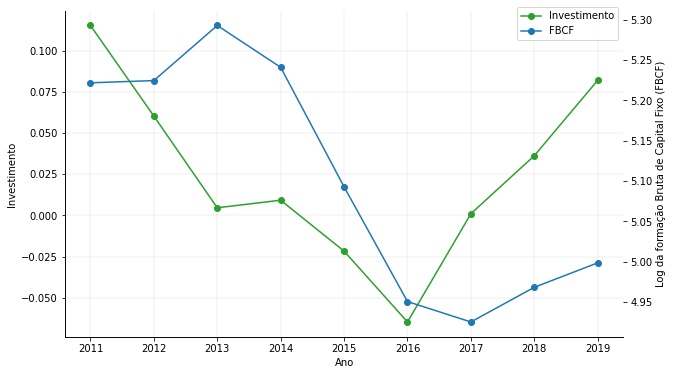

In [46]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#2ca02c'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='fbcf',
    ax=ax2,
    legend=False,
    marker='o',
    color='C0', 
    figsize=(10,6),
    label='FBCF'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log da formação Bruta de Capital Fixo (FBCF)')
plt.show()

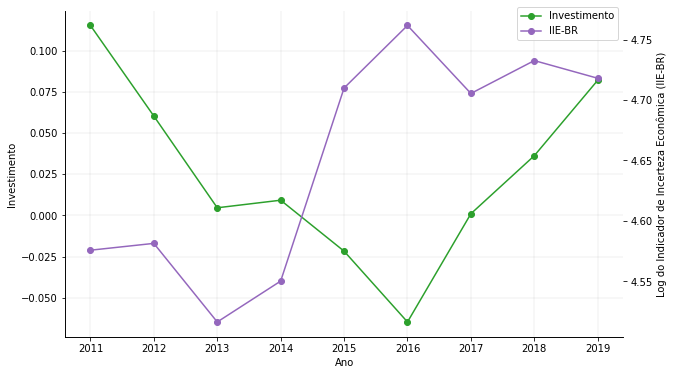

In [47]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#2ca02c'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='iee',
    ax=ax2,
    legend=False,
    marker='o',
    color='#9467bd', 
    figsize=(10,6),
    label='IIE-BR'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do Indicador de Incerteza Econômica (IIE-BR)')
plt.show()

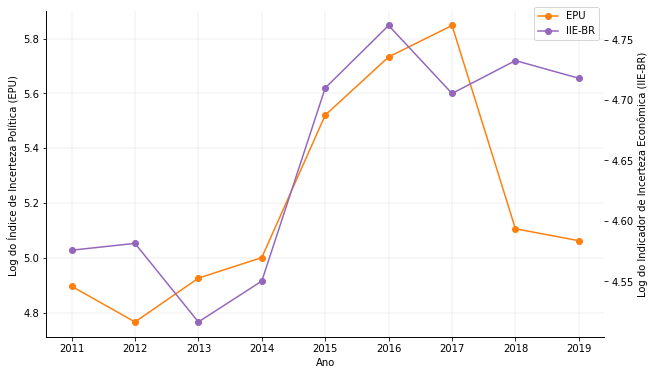

In [48]:
ax = pds.plot(
    x='ano',
    y='ln_epu',
    legend=False,
    label='EPU',
    marker='o',
    color='#ff7f0e'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Log do Índice de Incerteza Política (EPU) '
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='iee',
    ax=ax2,
    legend=False,
    marker='o',
    color='#9467bd', 
    figsize=(10,6),
    label='IIE-BR'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do Indicador de Incerteza Econômica (IIE-BR)')
plt.show()

In [125]:
inv_res['restricao'] = ['Restritas','Restritas','Restritas','Restritas',
'Restritas','Restritas','Restritas','Restritas','Restritas','Não Restritas','Não Restritas','Não Restritas',
'Não Restritas','Não Restritas','Não Restritas','Não Restritas','Não Restritas','Não Restritas']

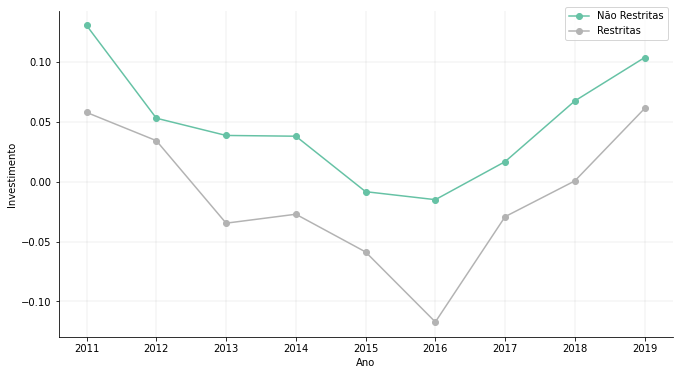

In [145]:
ax = inv_res.pivot_table(index='ano', columns='restricao', values='inv').plot(
    kind='line', 
    rot=0,
    legend=False,
    marker='o',
    label=['a','b'],
    figsize=(11,6),
    cmap='Set2')
ax.set_label(['a','b'])
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()